In [1]:
## https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
## https://gist.github.com/fchollet
meanloss = []
valloss = []

accuA = []
valaccuA = []

In [2]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
for i in range(5):
    # define cnn model
    def define_model():
        model = Sequential()
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(1, activation='sigmoid'))
        # compile model
        opt = SGD(learning_rate=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # plot diagnostic learning curves
    def summarize_diagnostics(history):
        f = pyplot.figure(figsize=(10,10))
        # plot loss
        ax = f.add_subplot(211)
        ax.title.set_text('Cross Entropy Loss')
        ax.plot(history.history['loss'], color='blue', label='train')
        ax.plot(history.history['val_loss'], color='orange', label='test')
        ax.legend()
        # plot accuracy
        ax2 = f.add_subplot(212)
        ax2.title.set_text('Classification Accuracy')
        ax2.plot(history.history['accuracy'], color='blue', label='train')
        ax2.plot(history.history['val_accuracy'], color='orange', label='test')
        ax2.legend()
        # save plot to file
#         filename = sys.argv[0].split('/')[-1]
        pyplot.savefig('loos128_128_plot.png')
        pyplot.close()

    # run the test harness for evaluating a model
    def run_test_harness():
        # define model
        model = define_model()
        # create data generator
        datagen = ImageDataGenerator(rescale=1.0/255.0)
        # prepare iterators
        train_it = datagen.flow_from_directory('split/train/',
            class_mode='binary', batch_size=64, target_size=(200, 200))
        test_it = datagen.flow_from_directory('split/test/',
            class_mode='binary', batch_size=64, target_size=(200, 200))
        # fit model
        history = model.fit(train_it, steps_per_epoch=len(train_it),
            validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
        # evaluate model
        _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
        print(i)
        print('> %.3f' % (acc * 100.0))
        print(f'loss mean = {history.history["loss"]}')
        print("*************************************")        
        print(f'loss valmean = {history.history["val_loss"]}')
        
        valloss.append(history.history["val_loss"])
        meanloss.append(history.history["loss"])
        
        accuA.append(history.history["accuracy"])
        valaccuA.append(history.history["val_accuracy"])
        # learning curves
        summarize_diagnostics(history)

    # entry point, run the test harness
    run_test_harness()
    print("-------------------------------\n")

Found 280 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
0
> 70.000
loss mean = [1.7784031629562378, 0.6894744634628296, 0.6806453466415405, 0.6690258383750916, 0.6368016004562378, 0.5827692747116089, 0.5846889019012451, 0.5322639346122742, 0.49955281615257263, 0.47530534863471985, 0.4618012607097626, 0.5064551830291748, 0.4507487714290619, 0.3977298140525818, 0.37254080176353455, 0.3219837248325348, 0.32293057441711426, 0.2616403102874756, 0.24522089958190918, 0.3225671350955963]
*************************************
loss valmean = [0.6907755136489868, 0.6842280030250549, 0.6738513112068176, 0.654815673828125, 0.5938303470611572, 0.5684846043586731, 0.5999702215194702, 0.5393207669258118, 0.5389562249183655, 0.579214870929718, 0.5990698337554932, 0.644573986530304, 0.462188720703125, 0.4649588167667389, 0.5734981894493103, 0.4962131083011627, 0.49465733766555786, 0.46425527334213257, 0.5975649952888489, 0.6007251739501953]
-------------------------------

Found

In [3]:
import numpy as np
meanloss = [float(sum(l))/len(l) for l in zip(*meanloss)]
print(meanloss)

valloss = [float(sum(l))/len(l) for l in zip(*valloss)]
print(valloss)

[4.375632405281067, 0.7295677185058593, 0.6757556200027466, 0.6579592823982239, 0.6326218605041504, 0.6140360116958619, 0.6025107860565185, 0.5664226889610291, 0.538491427898407, 0.5063194930553436, 0.5021104633808136, 0.47710386514663694, 0.4581739783287048, 0.48595752120018004, 0.4477518618106842, 0.38960596919059753, 0.39241102933883665, 0.3643706202507019, 0.31653129160404203, 0.3199878722429276]
[0.8909741401672363, 0.6729730606079102, 0.6581648707389831, 0.6415302634239197, 0.6221908569335938, 0.6161271095275879, 0.6017552852630615, 0.5820521950721741, 0.5912275552749634, 0.5782678127288818, 0.5767087459564209, 0.5702781975269318, 0.5540316939353943, 0.5879690527915955, 0.5140694379806519, 0.5669076144695282, 0.5581793665885926, 0.5394604444503784, 0.5409054696559906, 0.5452227592468262]


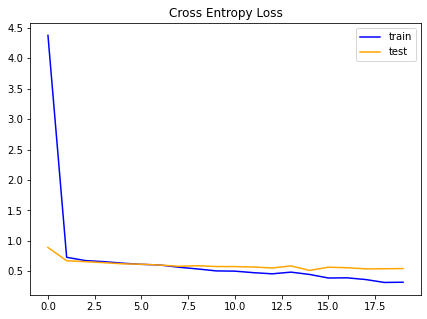

In [4]:
pyplot.figure(figsize=(7,5))
pyplot.title('Cross Entropy Loss')
pyplot.plot(meanloss, color='blue', label='train')
pyplot.plot(valloss, color='orange', label='test')
pyplot.legend()